In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Tensile Strength

In [2]:
df = pd.read_csv("sepSheets/tensileSheet.csv")
df

,SaltWater,Modulus(GPa),MaximumForce(KN),TensileStrain,TensileStrength(MPa)
0,0,7.205,3.02,1.60,79.80
1,0,6.975,2.93,1.64,77.49
2,0,6.842,2.96,1.73,78.40
3,0,7.026,2.92,1.63,77.29
4,0,6.906,3.02,1.72,79.83
5,1,10.223,2.72,1.57,113.98
6,1,10.059,2.81,1.60,117.91
7,1,9.564,2.76,1.67,115.53
8,1,10.182,2.80,1.59,117.32
9,1,10.011,2.83,1.66,118.37


In [3]:
df.describe()

,SaltWater,Modulus(GPa),MaximumForce(KN),TensileStrain,TensileStrength(MPa)
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.500000,8.499300,2.877000,1.641000,97.592000
std,0.527046,1.602383,0.107191,0.054252,20.112785
min,0.000000,6.842000,2.720000,1.570000,77.290000
25%,0.000000,6.987750,2.802500,1.600000,78.750000
50%,0.500000,8.384500,2.875000,1.635000,96.905000
75%,1.000000,10.047000,2.952500,1.667500,116.872500
max,1.000000,10.223000,3.020000,1.730000,118.370000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SaltWater             10 non-null     int64  
 1   Modulus(GPa)          10 non-null     float64
 2   MaximumForce(KN)      10 non-null     float64
 3   TensileStrain         10 non-null     float64
 4   TensileStrength(MPa)  10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [5]:
df.columns

Index(['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain',
       'TensileStrength(MPa)'],
      dtype='object')

In [6]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

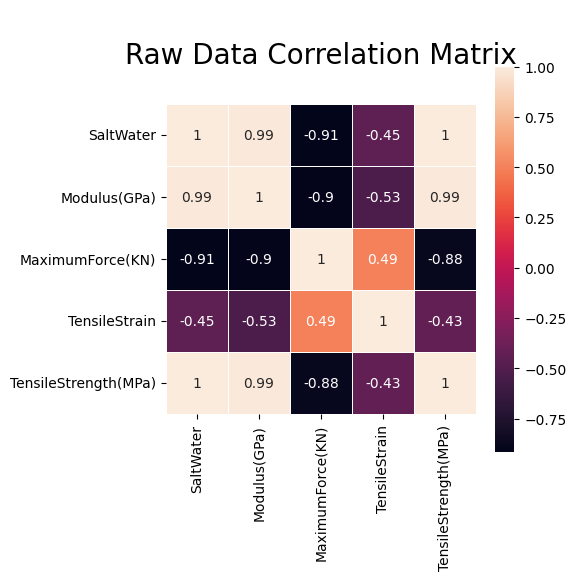

In [7]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True, annot=True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

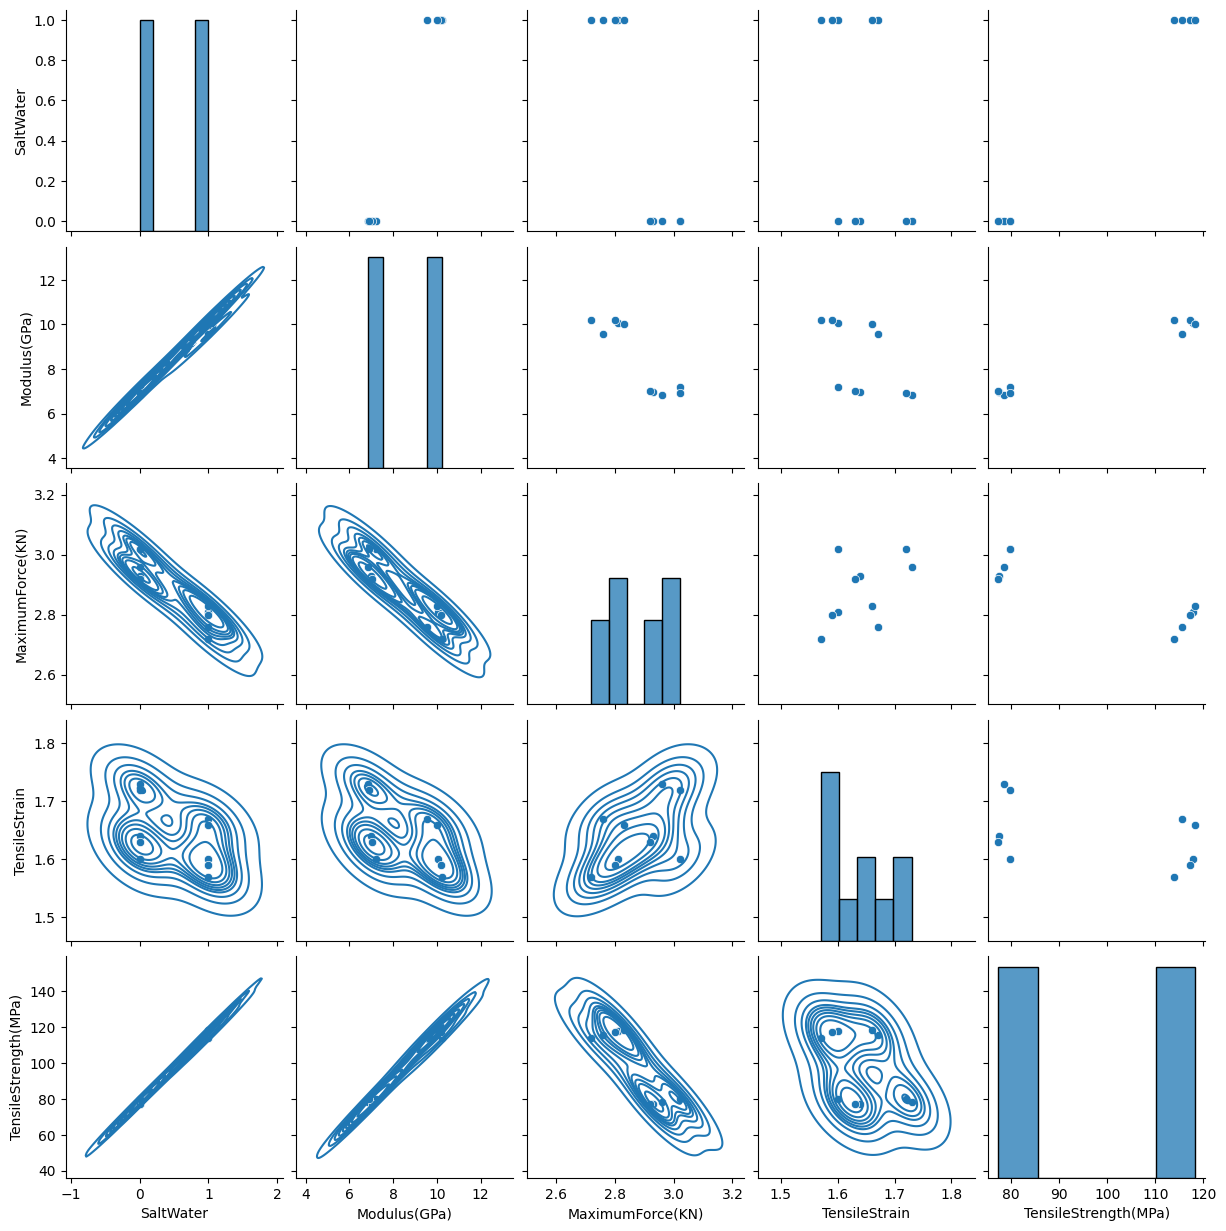

In [8]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [9]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='TensileStrength(MPa)')
fig.show()

In [10]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [11]:
fig = px.scatter_3d(df, x='TensileStrength(MPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [12]:
dataStuff = df[['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain']]
targetStuff = df['TensileStrength(MPa)']

In [13]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - Tensile Strength

In [14]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [15]:
yPred = modelLR.predict(xTest)
yPred

array([117.09589893,  77.13385474])

In [16]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.297540527545323
Mean Absolute Error: 0.29012316087933954
Mean Squared Error: 0.08853036553194911
R-squared: 0.9997767807544808


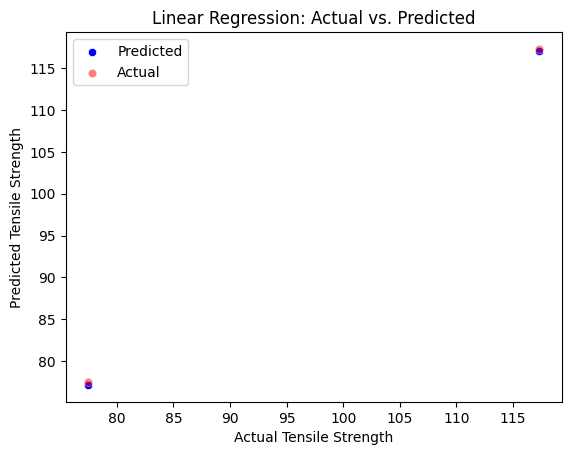

In [17]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - Tensile Strength

In [18]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [19]:
yPred = modelRR.predict(xTest)
yPred

array([117.53735109,  79.76612558])

In [20]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  1.6167852605954034
Mean Absolute Error:  1.2467383343927736
Mean Squared Error: 2.613994578878547
R-squared: 0.9934091100360601


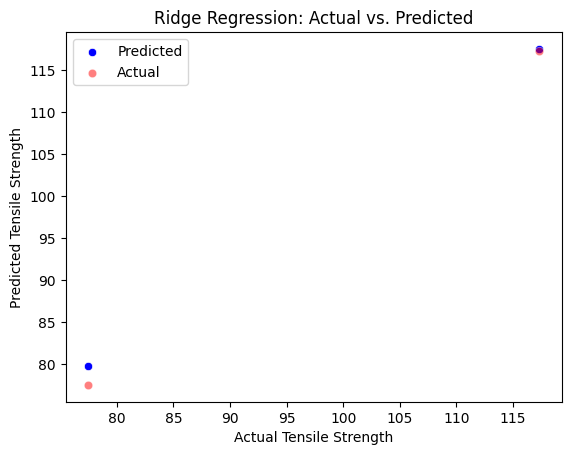

In [21]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - Tensile Strength

In [22]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [23]:
yPred = modelLSR.predict(xTest)
yPred

array([118.07761818,  79.57691319])

In [24]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  1.5699031736569236
Mean Absolute Error:  1.4222656827367004
Mean Squared Error: 2.4645959746580806
R-squared: 0.9937858016210923


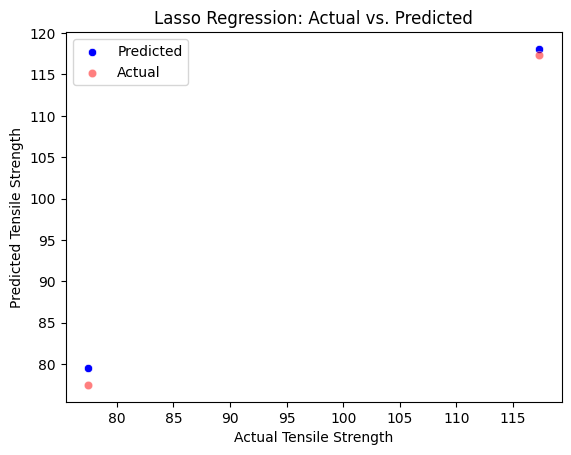

In [25]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - Tensile Strength

In [26]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [27]:
yPred = modelEN.predict(xTest)
yPred

array([114.76950088,  82.34347789])

In [28]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  3.876937797654484
Mean Absolute Error:  3.7019885036519753
Mean Squared Error: 15.030646686882003
R-squared: 0.9621019342577988


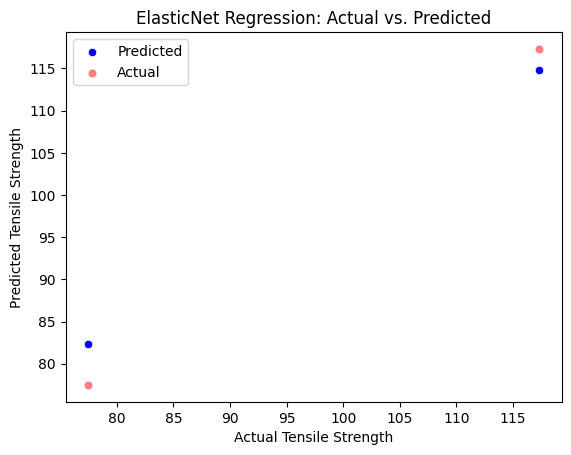

In [29]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - Tensile Strength

In [30]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.29754052754534754
Mean Absolute Error:  0.29012316087936796
Mean Squared Error: 0.08853036553196372
R-squared: 0.9997767807544808


Poly Features Degree:  2
Root Mean Square Error:  0.10184204199183404
Mean Absolute Error:  0.0941875553891407
Mean Squared Error: 0.010371801517066487
R-squared: 0.9999738486823656


Poly Features Degree:  3
Root Mean Square Error:  0.06819719857340913
Mean Absolute Error:  0.060178830396992566
Mean Squared Error: 0.004650857893260995
R-squared: 0.9999882733909013


Poly Features Degree:  4
Root Mean Square Error:  0.02430233379043422
Mean Absolute Error:  0.02420624425175788
Mean Squared Error: 0.0005906034276616809
R-squared: 0.999998510860644


Poly Features Degree:  5
Root Mean Square Error:  0.06481485333923365
Mean Absolute Error:  0.0647681841523351
Mean Squared Error: 0.004200965213386368
R-squared: 0.9999894077441142


Poly Features Degree:  6
Root Mean Square Error:  0.12708365433953342
Mean Ab

In [31]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'Tensile Strength Values': rsPRlist})
fig = px.line(prDf, x='Index', y='Tensile Strength Values')
fig.show()

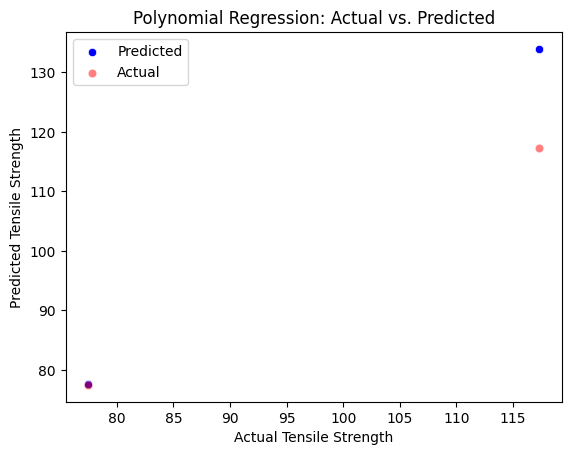

In [32]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - Tensile Strength

In [33]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [34]:
yPred = modelKN.predict(xTest)
yPred

array([116.75333333,  78.50666667])

In [35]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.8230195083417661
Mean Absolute Error:  0.7916666666666714
Mean Squared Error: 0.6773611111111224
R-squared: 0.998292111014591


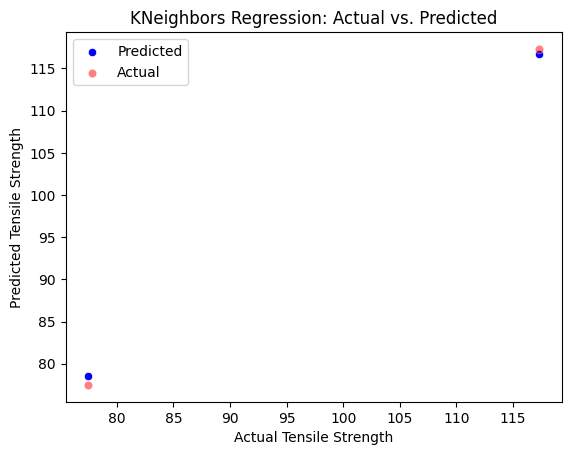

In [36]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - Tensile Strength

In [37]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [38]:
yPred = modelDT.predict(xTest)
yPred

array([117.91,  77.29])

In [39]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.4405110668303348
Mean Absolute Error: 0.394999999999996
Mean Squared Error: 0.19404999999999972
R-squared: 0.9995107250000299


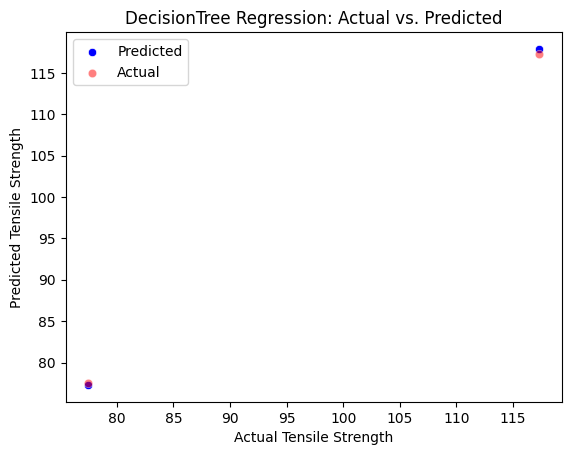

In [40]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - Tensile Strength

In [41]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [42]:
yPred = modelRF.predict(xTest)
yPred

array([117.1747,  79.7337])

In [43]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  1.5898587641674289
Mean Absolute Error: 1.1945000000000192
Mean Squared Error: 2.5276508899999843
R-squared: 0.993626815825153


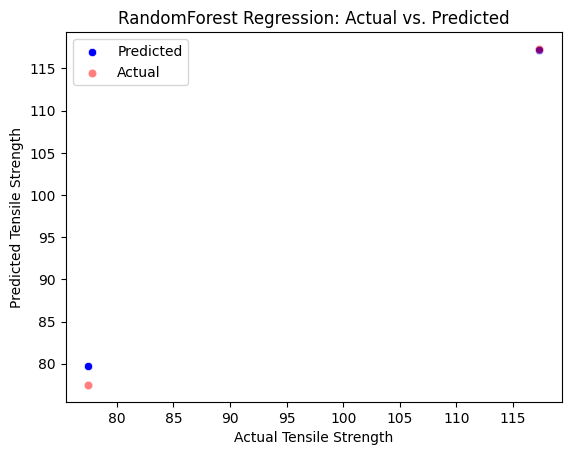

In [44]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - Tensile Strength

In [45]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [46]:
yPred = modelSVR.predict(xTest)
yPred

array([97.83521216, 95.98929408])

In [47]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  18.998432020108517
Mean Absolute Error: 18.992040957611266
Mean Squared Error: 360.9404192226846
R-squared: 0.08992979332969875


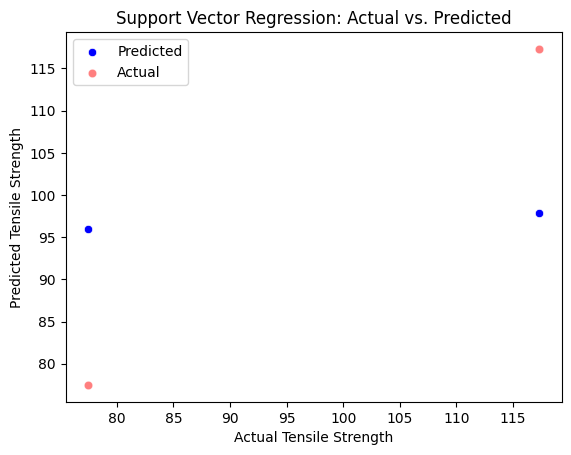

In [48]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg  - Tensile Strength

In [49]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [50]:
yPred = modelGBR.predict(xTest)
yPred

array([117.90946157,  77.29054049])

In [51]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.44002785984577514
Mean Absolute Error: 0.3944605379885928
Mean Squared Error: 0.19362451744045311
R-squared: 0.9995117978059012


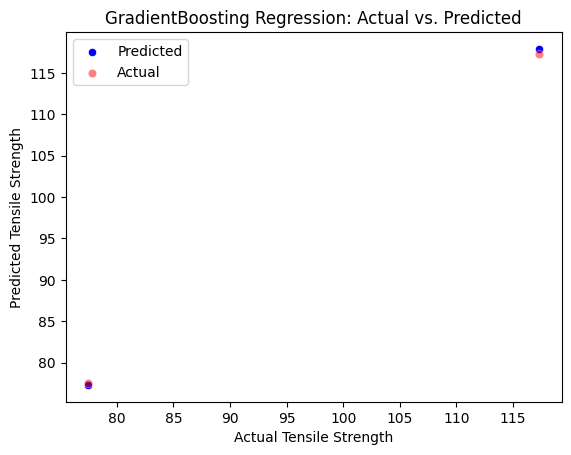

In [52]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [53]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [54]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [55]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared)')
fig.show()

In [56]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error)')
fig.show()

In [57]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error)')
fig.show()

In [58]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error)')
fig.show()

In [59]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([ 80.07189015,  77.13385474,  78.24064406,  76.80110876,
         80.20635704, 114.44814592, 117.41109395, 115.77189358,
        117.09589893, 118.15886654]),
 array([ 82.08311262,  79.76612558,  78.42747804,  80.29289224,
         79.05692628, 117.98672647, 116.26520577, 111.2038836 ,
        117.53735109, 115.79377498]),
 array([ 82.33811124,  79.57691319,  77.9802204 ,  80.18917884,
         78.74855377, 118.56983175, 116.60097748, 110.65839907,
        118.07761818, 116.02472746]),
 array([ 84.47559969,  82.34347789,  81.11055528,  82.81625272,
         81.70384135, 115.14957477, 113.62927922, 109.04058229,
        114.76950088, 113.18431467]),
 array([ 79.8       ,  77.62625603,  78.4       ,  77.29      ,
         79.83      , 113.98      , 117.91      , 115.53      ,
        133.93760452, 118.37      ]),
 array([ 78.97333333,  78.50666667,  78.50666667,  78.97333333,
         78.50666667, 116.75333333, 116.75333333, 117.27      ,
        116.75333333, 116.75333333]),
 arr

In [60]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [61]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"TensileStrength Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [62]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

,TensileStrength Predicted Values,Models,Index
0,80.071890,Linear Reg,0
1,77.133855,Linear Reg,1
2,78.240644,Linear Reg,2
3,76.801109,Linear Reg,3
4,80.206357,Linear Reg,4
...,...,...,...
105,113.980000,Actual Targets,5
106,117.910000,Actual Targets,6
107,115.530000,Actual Targets,7
108,117.320000,Actual Targets,8


In [63]:
fig = px.line(combinedDf, x='Index', y='TensileStrength Predicted Values', color='Models')
fig.show()

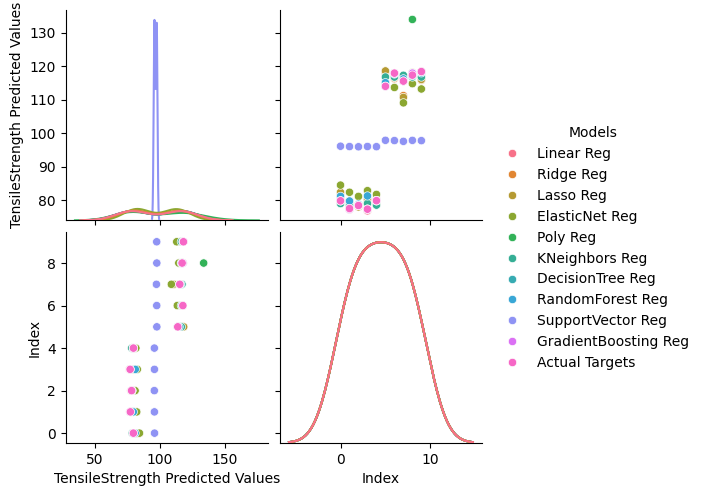

In [64]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

# Young Modulus

In [65]:
dataStuff = df[['SaltWater', 'TensileStrength(MPa)', 'MaximumForce(KN)', 'TensileStrain']]
targetStuff = df['Modulus(GPa)']

In [66]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - Young Modulus

In [67]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [68]:
yPred = modelLR.predict(xTest)
yPred

array([10.11261589,  7.04788001])

In [69]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.07115353490992928
Mean Absolute Error: 0.07113206167500818
Mean Squared Error: 0.0050628255301785234
R-squared: 0.9980309577592521


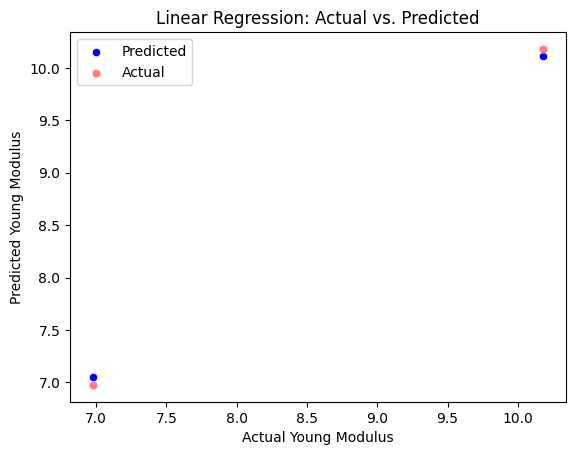

In [70]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - Young Modulus

In [71]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [72]:
yPred = modelRR.predict(xTest)
yPred

array([10.02486386,  6.90398957])

In [73]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  0.12193081663980988
Mean Absolute Error:  0.11407328570998176
Mean Squared Error: 0.01486712404645094
R-squared: 0.9942178542255892


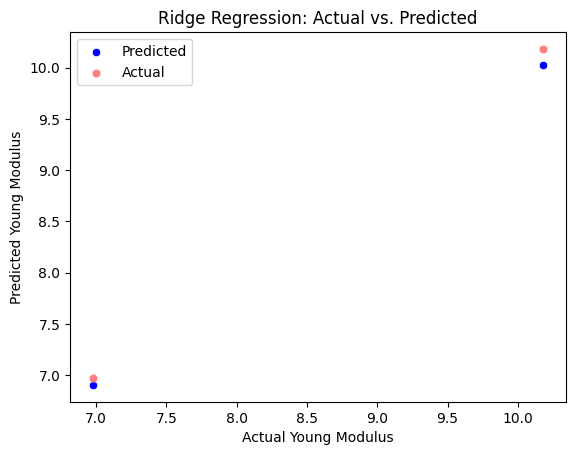

In [74]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - Young Modulus

In [75]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [76]:
yPred = modelLSR.predict(xTest)
yPred

array([9.96903165, 6.95458666])

In [77]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  0.15128156578770705
Mean Absolute Error:  0.11669084902275673
Mean Squared Error: 0.022886112147180337
R-squared: 0.9910990964875885


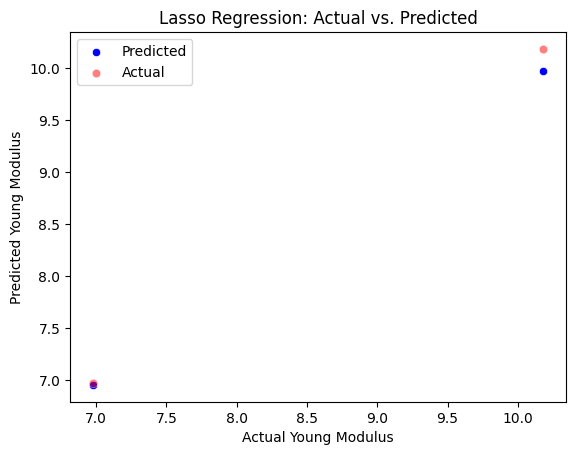

In [78]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - Young Modulus

In [79]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [80]:
yPred = modelEN.predict(xTest)
yPred

array([9.99455121, 6.92846091])

In [81]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  0.13657037694845128
Mean Absolute Error:  0.11699393942410863
Mean Squared Error: 0.01865146785984207
R-squared: 0.9927460411485508


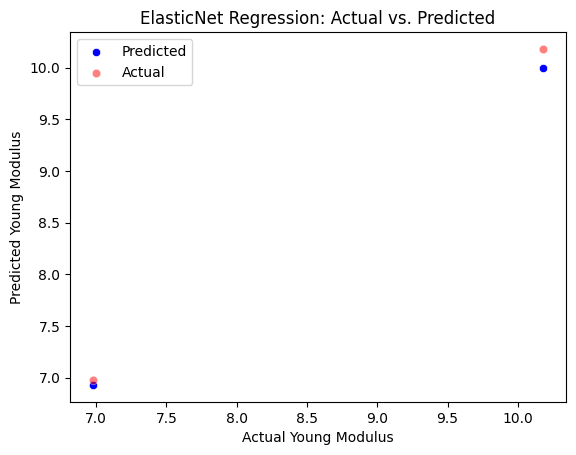

In [82]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - Young Modulus

In [83]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.07115353490992568
Mean Absolute Error:  0.07113206167500463
Mean Squared Error: 0.005062825530178013
R-squared: 0.9980309577592523


Poly Features Degree:  2
Root Mean Square Error:  0.1175786726789726
Mean Absolute Error:  0.10736126222226083
Mean Squared Error: 0.013824744268948978
R-squared: 0.9946232582436751


Poly Features Degree:  3
Root Mean Square Error:  0.12380459176136963
Mean Absolute Error:  0.1088292895783578
Mean Squared Error: 0.015327576941199393
R-squared: 0.9940387741458531


Poly Features Degree:  4
Root Mean Square Error:  0.13125907376290158
Mean Absolute Error:  0.1121938439093988
Mean Squared Error: 0.017228944445094835
R-squared: 0.9932992912408943


Poly Features Degree:  5
Root Mean Square Error:  0.13905768000831095
Mean Absolute Error:  0.11661241876231321
Mean Squared Error: 0.0193370383692938
R-squared: 0.9924794079643585


Poly Features Degree:  6
Root Mean Square Error:  0.14654075422544074
Mean Absol

In [84]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'Young Modulus Predicted Values': rsPRlist})
fig = px.line(prDf, x='Index', y='Young Modulus Predicted Values')
fig.show()

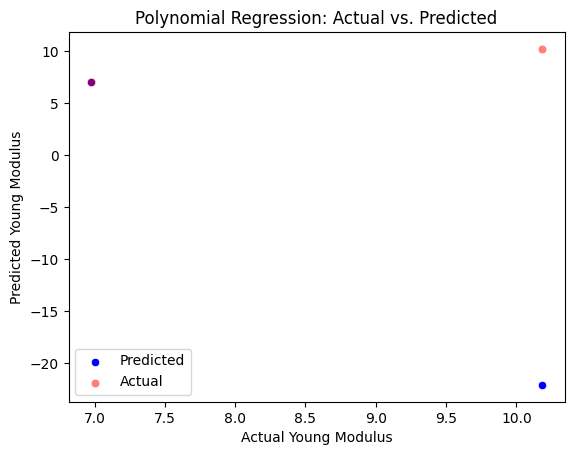

In [85]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - Young Modulus

In [86]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [87]:
yPred = modelKN.predict(xTest)
yPred

array([9.878     , 7.02433333])

In [88]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.21777256229582506
Mean Absolute Error:  0.1766666666666672
Mean Squared Error: 0.04742488888888901
R-squared: 0.9815554360053749


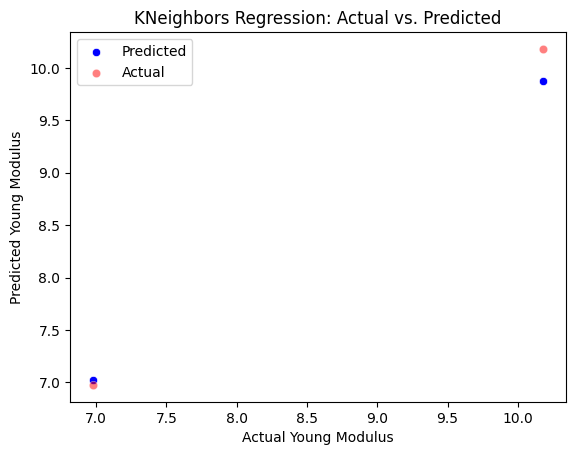

In [89]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - Young Modulus

In [90]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [91]:
yPred = modelDT.predict(xTest)
yPred

array([10.059,  7.026])

In [92]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.09415412895885206
Mean Absolute Error: 0.08700000000000063
Mean Squared Error: 0.008865000000000144
R-squared: 0.9965522099546624


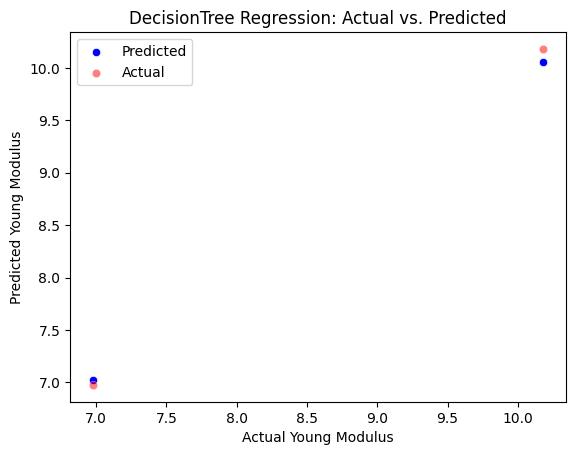

In [93]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - Young Modulus

In [94]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [95]:
yPred = modelRF.predict(xTest)
yPred

array([10.05451,  7.11231])

In [96]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  0.13249101139322958
Mean Absolute Error: 0.13240000000000363
Mean Squared Error: 0.01755386810000089
R-squared: 0.9931729214109022


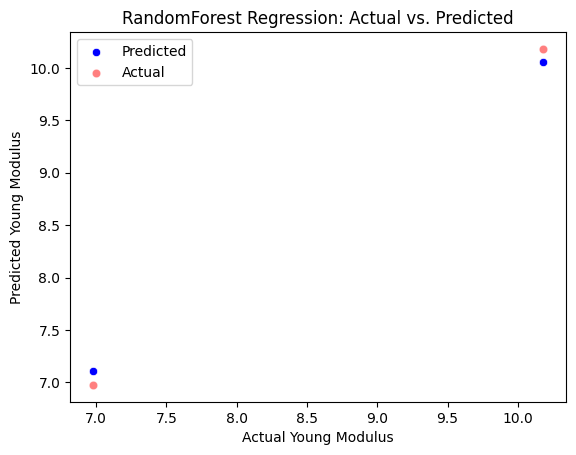

In [97]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - Young Modulus

In [98]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [99]:
yPred = modelSVR.predict(xTest)
yPred

array([9.12087865, 7.63073748])

In [100]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  0.8820346246085027
Mean Absolute Error: 0.8584294134098558
Mean Squared Error: 0.7779850790082623
R-squared: 0.6974247929130464


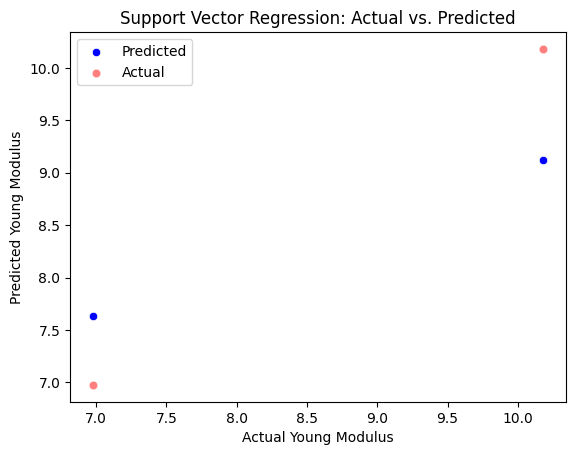

In [101]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model - Young Modulus

In [102]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [103]:
yPred = modelGBR.predict(xTest)
yPred

array([10.05895674,  7.02603846])

In [104]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.09419280291342727
Mean Absolute Error: 0.08704086080166107
Mean Squared Error: 0.008872284120687753
R-squared: 0.9965493770027396


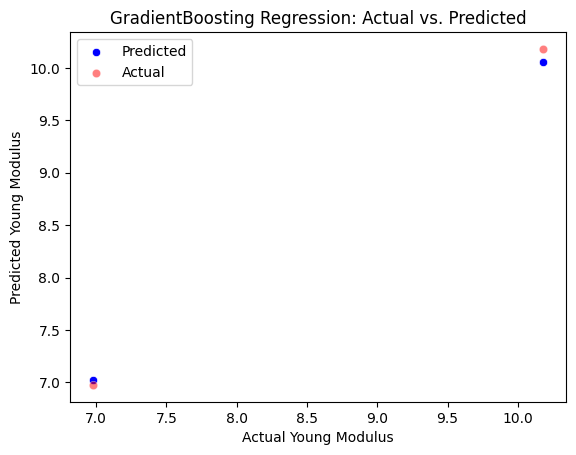

In [105]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [130]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [131]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [132]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared)')
fig.show()

In [133]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error)')
fig.show()

In [134]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error)')
fig.show()

In [135]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error)')
fig.show()

In [136]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([ 7.27434209,  7.04788001,  6.76990652,  7.07381209,  6.8609393 ,
        10.07455804, 10.09530894,  9.78038338, 10.11261589,  9.90674964]),
 array([ 7.08183829,  6.90398957,  6.96648942,  6.88966976,  7.07532952,
         9.77144119, 10.06931918,  9.88225989, 10.02486386, 10.09965274]),
 array([ 7.12941387,  6.95458666,  7.02345798,  6.9394501 ,  7.13168435,
         9.71625117, 10.01368448,  9.83355948,  9.96903165, 10.04849856]),
 array([ 7.10628337,  6.92846091,  6.99851218,  6.91306503,  7.10859275,
         9.73743995, 10.03996907,  9.85675805,  9.99455121, 10.0753796 ]),
 array([  7.205     ,   7.0234372 ,   6.842     ,   7.026     ,
          6.906     ,  10.223     ,  10.059     ,   9.564     ,
        -22.06518418,  10.011     ]),
 array([6.98433333, 7.02433333, 7.02433333, 7.02433333, 6.98433333,
        9.94866667, 9.878     , 9.94866667, 9.878     , 9.878     ]),
 array([ 7.205,  7.026,  6.842,  7.026,  6.906, 10.223, 10.059,  9.564,
        10.059, 10.011]),
 array

In [137]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [138]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Young Modulus Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [139]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

,Young Modulus Predicted Values,Models,Index
0,7.274342,Linear Reg,0
1,7.047880,Linear Reg,1
2,6.769907,Linear Reg,2
3,7.073812,Linear Reg,3
4,6.860939,Linear Reg,4
...,...,...,...
105,10.223000,Actual Targets,5
106,10.059000,Actual Targets,6
107,9.564000,Actual Targets,7
108,10.182000,Actual Targets,8


In [140]:
fig = px.line(combinedDf, x='Index', y='Young Modulus Predicted Values', color='Models')
fig.show()

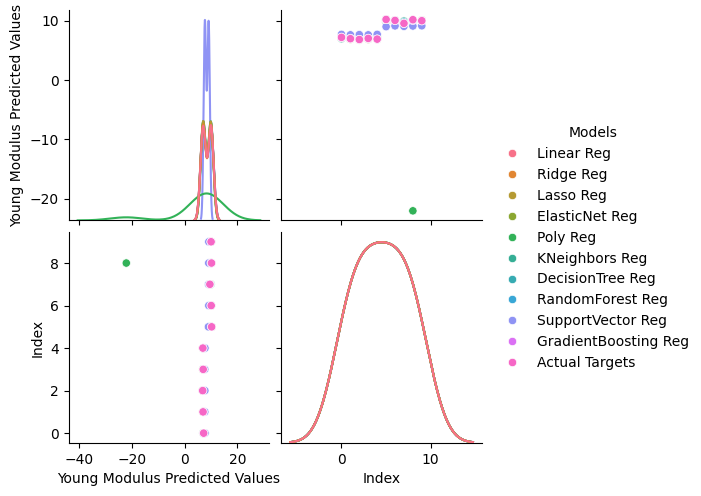

In [141]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

In [142]:
models.remove('Poly Reg')
rsScores.remove(rsPR)
rmseScores.remove(rmsePR)
mseScores.remove(msePR)
maeScores.remove(maePR)

In [143]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) w/o PolyReg')
fig.show()

In [145]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) w/o PolyReg')
fig.show()

In [146]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) w/o PolyReg')
fig.show()

In [147]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) w/o PolyReg')
fig.show()